# Data-scraping box-fans

Import all the needed modules

In [1]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np

Import planning file to get the cost amount


In [2]:
planning_file = 'Planning.xlsx'
df_planning = pd.read_excel(planning_file,
                   usecols = ['CO','Line','MO no','CO Item no','Cost amount'])
df_planning.head()

,CO,Line,MO no,CO Item no,Cost amount
0,4289413,7,1.002910e+09,KPB 9-9 Boxfan,308.686
1,4289413,8,1.002910e+09,KPB 9-9 Boxfan,288.385
2,4289413,11,1.002910e+09,KPB 9-9 Boxfan,310.001
3,4289413,12,1.002910e+09,KPB 9-9 Boxfan,308.958
4,4289413,13,1.002910e+09,KPB 9-9 Boxfan,308.958


Import box-fan type file

In [3]:
type_file = 'Type.xlsx'
df_type = pd.read_excel(type_file)
df_type.head()

,CO Item no,Type,Size
0,KPB 9-9 Boxfan,KPB,9
1,KPB 10-10 Boxfan,KPB,10
2,KPB 12-12 Boxfan,KPB,12
3,KPB 15-15 Boxfan,KPB,15
4,KPB 18-18 Boxfan,KPB,18


Import motor file

In [4]:
motors_file = 'Motors.xlsx'
df_motors = pd.read_excel(motors_file)
df_motors['Component no'] = df_motors['Component no'].astype(str)
df_motors.head()

,Component no,Speeds,Motor power
0,109009,One speed,0.25
1,109010,One speed,0.37
2,109011,One speed,0.55
3,109008,One speed,0.75
4,109012,One speed,1.10


Import inlet file

In [5]:
inlet_file = 'Inlet.xlsx'
df_inlet = pd.read_excel(inlet_file, usecols = ['Component no','Inlet'])
df_inlet['Component no'] = df_inlet['Component no'].astype(str)
df_inlet.head()

,Component no,Inlet
0,645279,Blind inlet panel
1,645280,Blind inlet panel
2,645281,Blind inlet panel
3,645282,Blind inlet panel
4,645283,Blind inlet panel


Import MO's file

In [6]:
mos_file = 'MOs BF.xlsx'
df_mos = pd.read_excel(mos_file, usecols = ['MO no', 'Component no'])
df_mos['Component no'] = df_mos['Component no'].astype(str)
df_mos.head()

,MO no,Component no
0,1003458164,647666
1,1003458164,109619
2,1003458164,90840215
3,1003458164,2482500
4,1003458164,90846338


Import Classification file

In [7]:
class_file = 'Classification.xlsx'
df_class = pd.read_excel(class_file, usecols = ['Component no', 'Type'])
df_class['Component no'] = df_class['Component no'].astype(str)
df_class.head()

,Component no,Type
0,645163,Roof
1,645164,Roof
2,645165,Roof
3,645166,Roof
4,645167,Roof


Merge all the box-fans types in the planning file and get the motor power consumption for each row in the new map dataframe

In [8]:
df_map = pd.merge(df_planning, df_type, on='CO Item no')
df_map.drop('CO Item no', axis = 1, inplace=True)
df_motors_map = pd.merge(df_mos, df_motors, on='Component no')
df_motors_map.drop(['Component no'], axis=1, inplace=True)
df_map = pd.merge(df_map, df_motors_map, on='MO no')
df_map.head()

,CO,Line,MO no,Cost amount,Type,Size,Speeds,Motor power
0,4625715,2,1.003458e+09,310.148,KPB,9,One speed,0.55
1,4627387,2,1.003462e+09,301.933,KPB,9,One speed,0.25
2,4665811,1,1.003517e+09,276.045,KPB,9,One speed,0.25
3,4665811,3,1.003517e+09,298.370,KPB,9,One speed,0.75
4,4665811,5,1.003517e+09,290.844,KPB,9,One speed,0.25


Get the inlet type for each row in the new map dataframe

In [9]:
df_inlet_map = pd.merge(df_mos, df_inlet, on='Component no')
df_inlet_map.drop(['Component no'], axis=1, inplace=True)
df_map = pd.merge(df_map, df_inlet_map, on='MO no', how = 'outer')
df_map = df_map.fillna(0)
df_map['Inlet'] = df_map['Inlet'].replace(0,'')
df_map.head()

,CO,Line,MO no,Cost amount,Type,Size,Speeds,Motor power,Inlet
0,4625715.0,2.0,1.003458e+09,310.148,KPB,9.0,One speed,0.55,Inlet spigot
1,4627387.0,2.0,1.003462e+09,301.933,KPB,9.0,One speed,0.25,Inlet spigot
2,4665811.0,1.0,1.003517e+09,276.045,KPB,9.0,One speed,0.25,Inlet spigot
3,4665811.0,3.0,1.003517e+09,298.370,KPB,9.0,One speed,0.75,Inlet spigot
4,4665811.0,5.0,1.003517e+09,290.844,KPB,9.0,One speed,0.25,Inlet spigot


Get the rest of accessories from each row of the MOs file. Create a pivot table and a new df

In [10]:
df_pivot = pd.merge(df_mos, df_class, on='Component no')
df_pivot = pd.pivot_table(df_pivot, values = 'Component no', index = 'MO no', columns = 'Type', aggfunc = 'count')
df_pivot = pd.DataFrame(df_pivot.to_records())

# Create only one check for each accessory
div = df_pivot.iloc[:, 1:]/df_pivot.iloc[:, 1:]
df_pivot = pd.concat([df_pivot['MO no'], div], axis = 1)
df_pivot = df_pivot.fillna(0)
df_pivot.head()

,MO no,DG,Filters,Power Switch,Pressure switch,Roof,Set Out. Rain Protec.,VFD
0,1003425793,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1003452921,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1003452922,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1003458162,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1003458163,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Merge to the final dataframe and remove zero-value rows. Rearrange the columns

In [11]:
df_map = pd.merge(df_map, df_pivot, on='MO no', how='outer')
df_map = df_map.fillna(0)
df_map = df_map[df_map['CO'] != 0]
cols = ['CO', 'Line', 'MO no', 'Cost amount', 'Type', 'Size', 'Speeds', 'Motor power',
       'Inlet', 'Power Switch', 'Pressure switch', 'Roof', 'Set Out. Rain Protec.', 'VFD',
       'Filters', 'DG']
df_map = df_map[cols]
df_map.head()

,CO,Line,MO no,Cost amount,Type,Size,Speeds,Motor power,Inlet,Power Switch,Pressure switch,Roof,Set Out. Rain Protec.,VFD,Filters,DG
0,4625715.0,2.0,1.003458e+09,310.148,KPB,9.0,One speed,0.55,Inlet spigot,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4627387.0,2.0,1.003462e+09,301.933,KPB,9.0,One speed,0.25,Inlet spigot,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4665811.0,1.0,1.003517e+09,276.045,KPB,9.0,One speed,0.25,Inlet spigot,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4665811.0,3.0,1.003517e+09,298.370,KPB,9.0,One speed,0.75,Inlet spigot,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4665811.0,5.0,1.003517e+09,290.844,KPB,9.0,One speed,0.25,Inlet spigot,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Export to Excel

In [12]:
name = 'Pivot table box-fans.xlsx'
writer = pd.ExcelWriter(name)
df_map.to_excel(writer, index = False)
writer.save()

Histograms

In [21]:
df_dif = pd.read_excel('r-c.xlsx')
df_dif.head()

,Net difference,Percentage
0,181.637792,0.098730
1,63.868442,0.081429
2,63.868442,0.081429
3,63.868442,0.081429
4,63.868442,0.081429


Plot histograms

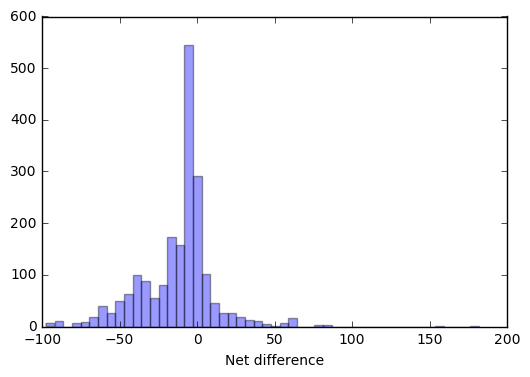

In [22]:
import seaborn as sns
%matplotlib inline

sns.distplot(df_dif['Net difference'],kde=False)

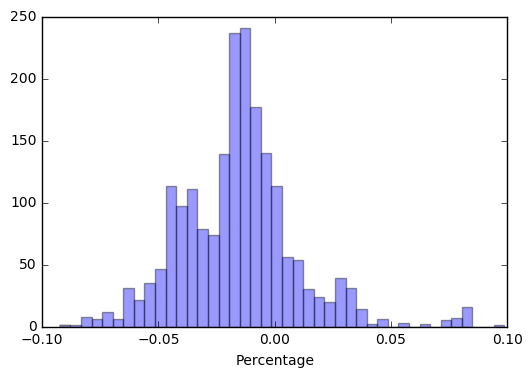

In [23]:
sns.distplot(df_dif['Percentage'], kde=False)